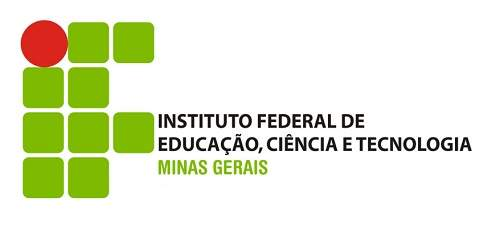

**Engenharia de Controle e Automação - Processamento de Sinais** - Prof. Leandro Freitas

#  João Vitor Prata Moreira Salgado - 0038210
#  Fernando andrade da Silva - 0037130

##  Trabalho Prático 04 

### Projeto de Filtros FIR

## Introdução

Trabalho de Processamento de sinais abordando a filtragem por janelamento.

## Objetivo

Projeto e implementação de um filtro FIR com diferentes janelamentos.

# PROJETO DE FILTROS FIR

Para isso, considere o sinal: x(t) = 1,5 sin(2πa1t) − 3 sin(2πa2t) + 2 sin(2π(a1 + a2)t), em que a1 e a2 são
respectivamente o último número do registro acadêmico (RA) de cada integrante da dupla, sendo que a1 < a2 e que
a1 ≠ a2, sendo estes não nulos. Portanto, se os últimos números forem iguais ou um deles for zero, escolha o
penúltimo dígito de um dos alunos.

In [3]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import IPython.display as ipd
from scipy.io import wavfile
from scipy import signal


In [55]:
a1=1

In [56]:
a2=3

In [57]:
fs = 5*(a1+a2)

In [58]:
t= np.arange(0,1000,1/fs)

In [59]:
x = 1.5*np.sin(2*np.pi*a1*t) - 3*np.sin(2*np.pi*a2*t) + 2*np.sin(2*np.pi*(a1+a2)*t) #sinal domínio do tempo

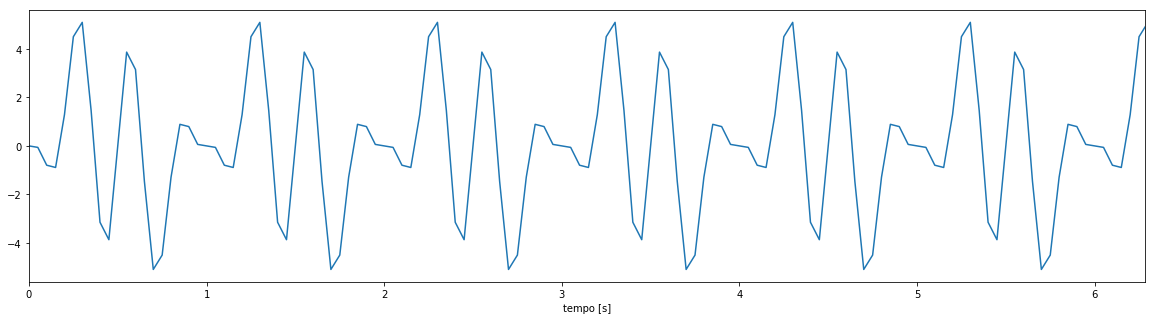

In [60]:
plt.figure(figsize=(20,5))
plt.plot(t,x)
plt.xlabel('tempo [s]')
plt.xlim((0,2*np.pi))
plt.show()

In [61]:
x_sp = np.fft.fft(x) #espectro do sinal

In [62]:
x_freq = np.fft.fftfreq(len(x), 1/2/np.pi) 

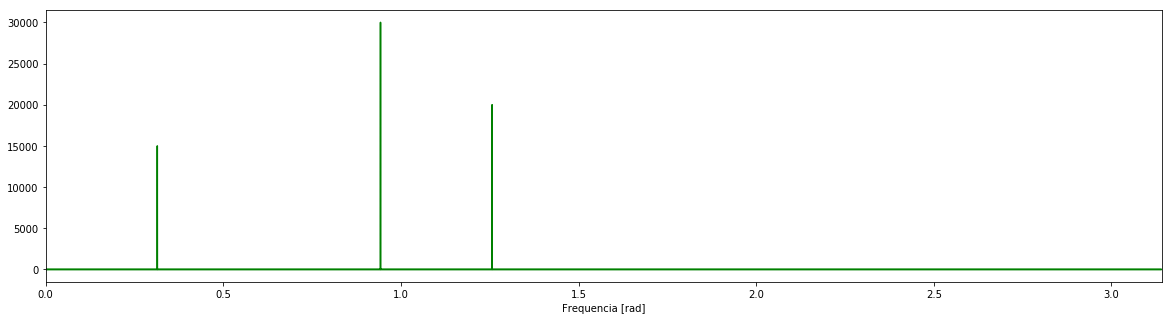

In [63]:
plt.figure(figsize=(20,5))
plt.plot(x_freq,abs(x_sp),'g')
plt.xlabel('Frequencia [rad]')
plt.xlim((0,np.pi))
plt.show()

## Deve ser feito o projeto de três tipos de filtros FIR:
### a) Passa-baixas (ya): em que apenas a frequência correspondente à a1 apareça na saída do filtro;

## Janela Hamming

In [64]:
filtro_a1 = sp.signal.firwin(500,2, width=None, window='hamming', fs=fs, pass_zero=True) #Criação do filtro firwin janela hamming

In [65]:
ya1 = np.convolve(x,filtro_a1) #Convolução sinal domínio do tempo com a filtro firwin

In [66]:
ya1_sp = np.fft.fft(ya1) 

In [67]:
ya1_freq = np.fft.fftfreq(len(ya1), 1/2/np.pi) 


## Janela Kaiser

In [108]:
M,beta = sp.signal.kaiserord(1150,0.315)
print ("Ordem =",M) 
print ("beta =",beta)

Ordem = 507
beta = 125.77126


In [109]:
filtro_a2 = sp.signal.firwin(M,2, window=('kaiser',beta), fs=fs, pass_zero=True)

In [110]:
ya2 = np.convolve(x,filtro_a2)

In [111]:
ya2_sp = np.fft.fft(ya2) 

In [112]:
ya2_freq = np.fft.fftfreq(len(ya2), 1/2/np.pi) 

Sinal Ideal

In [113]:
ya_ideal = 1.5*np.sin(2*np.pi*a1*t)

#### Gráfico no domínio do *tempo*

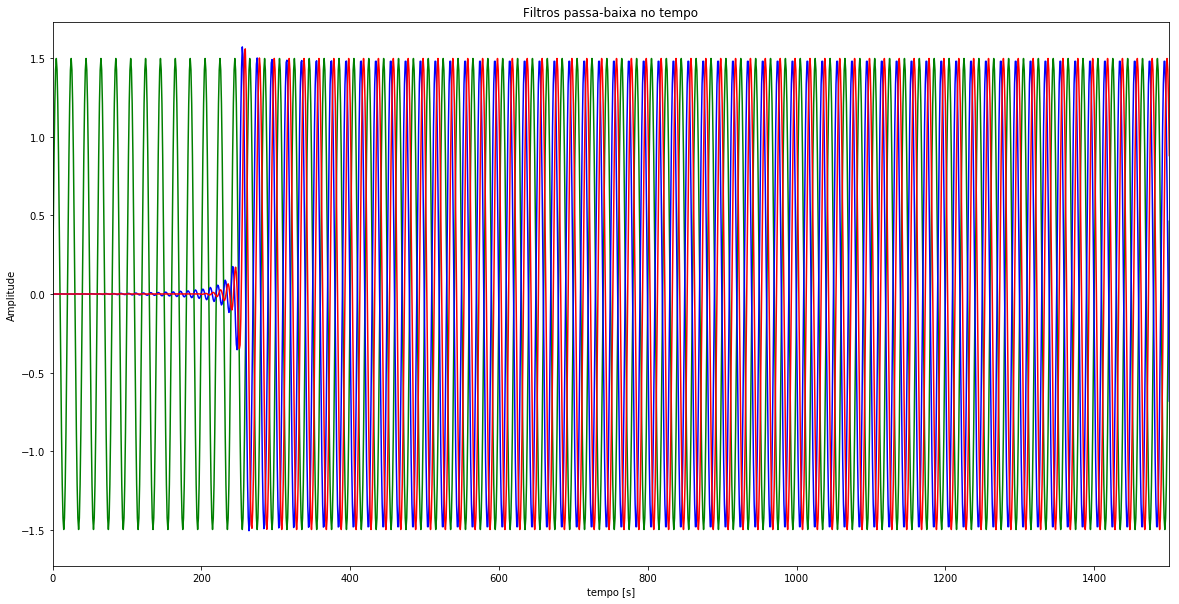

In [119]:
plt.figure(figsize=(20,10))
plt.plot((ya_ideal),'g') 
plt.plot((ya1),'b') #plot do sinal filtrado janela hamming
plt.plot((ya2),'r') #plot do sinal filtrado janela kaiser
plt.title('Filtros passa-baixa no tempo')
plt.ylabel('Amplitude')
plt.xlabel('tempo [s]')
plt.xlim((0,1500))
plt.show()

A janela hamming possui uma atenuação um pouco maior que a kaiser,
além disso o atraso de que ambos implicaram no sinão, resultou em uma aproximidade considerável. 

#### Gráficos no domínio da frequência

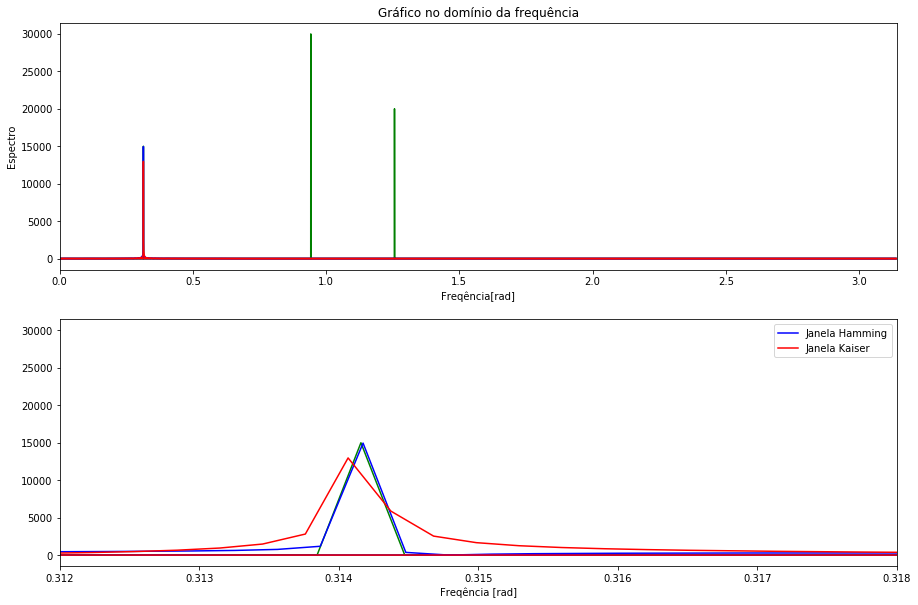

In [126]:
plt.figure(figsize=(15,10))

plt.subplot(2, 1, 1)
plt.plot(x_freq,abs(x_sp),'g')
plt.plot(ya1_freq,(abs(ya1_sp)),'b') #plot do sinal filtrado janela hamming no dom. freq
plt.plot(ya2_freq,(abs(ya2_sp)),'r') #plot do sinal filtrado janela kaiser no dom. freq
plt.ylabel('Espectro')
plt.xlabel('Freqência[rad]')
plt.title('Gráfico no domínio da frequência')
plt.xlim(0,np.pi)

plt.subplot(2, 1, 2)
plt.plot(x_freq,abs(x_sp),'g') 
plt.plot(ya1_freq,(abs(ya1_sp)),'b', label="Janela Hamming") 
plt.plot(ya2_freq,(abs(ya2_sp)),'r', label="Janela Kaiser") 
plt.legend(loc='upper right')
plt.xlabel('Freqência [rad]')
plt.xlim((0.312,0.318))



plt.show()



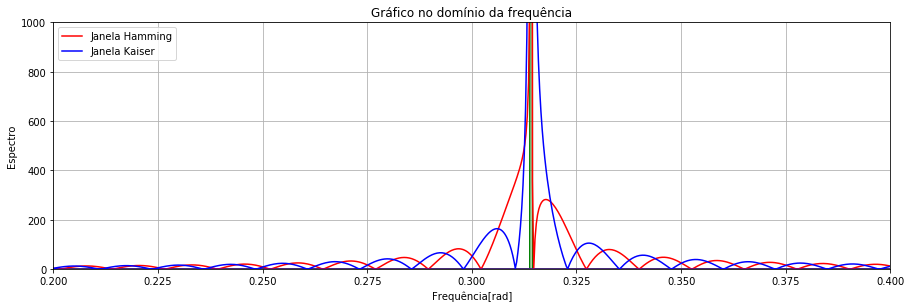

In [125]:
plt.figure(figsize=(15,10))

plt.subplot(2, 1, 2)
plt.plot(x_freq,(abs(x_sp)),'g')
plt.plot(ya1_freq,(abs(ya1_sp)), 'r',label="Janela Hamming") 
plt.plot(ya2_freq,(abs(ya2_sp)), 'b',label="Janela Kaiser") 
plt.legend(loc='upper left')
plt.xlim(0.2,0.4)
plt.ylim(0, 1000)
plt.title('Gráfico no domínio da frequência')
plt.ylabel('Espectro')
plt.xlabel('Frequência[rad]')
plt.grid(True)

A janela hamming  tem maior atenuação na banda de rejeição do que o Kaiser,porém uma resposta mair rápida. 


## b) Passa-altas (yb): em que apenas a frequência correspondente à a1 + a2 apareça na saída do filtro;

## Janela cosine

In [77]:
filtro_b1 = sp.signal.firwin(201,3.5, width=None, window='cosine', fs=fs, pass_zero= False)

In [78]:
yb1 = np.convolve(x,filtro_b1)

In [79]:
yb1_sp = np.fft.fft(yb1) 

In [80]:
yb1_freq = np.fft.fftfreq(len(yb1), 1/2/np.pi) 

# Janela flattop

In [81]:
filtro_b2 = sp.signal.firwin(21, 3.5 ,width=None, window='flattop', fs=fs, pass_zero=False)

In [82]:
yb2 = np.convolve(x,filtro_b2)

In [83]:
yb2_sp = np.fft.fft(yb2) 

In [84]:
yb2_freq = np.fft.fftfreq(len(yb2), 1/2/np.pi) 

Sinal Ideal

In [85]:
yb_ideal = 2*np.sin(2*np.pi*(a1+a2)*t)

#### Gráfico no domínio do *tempo*

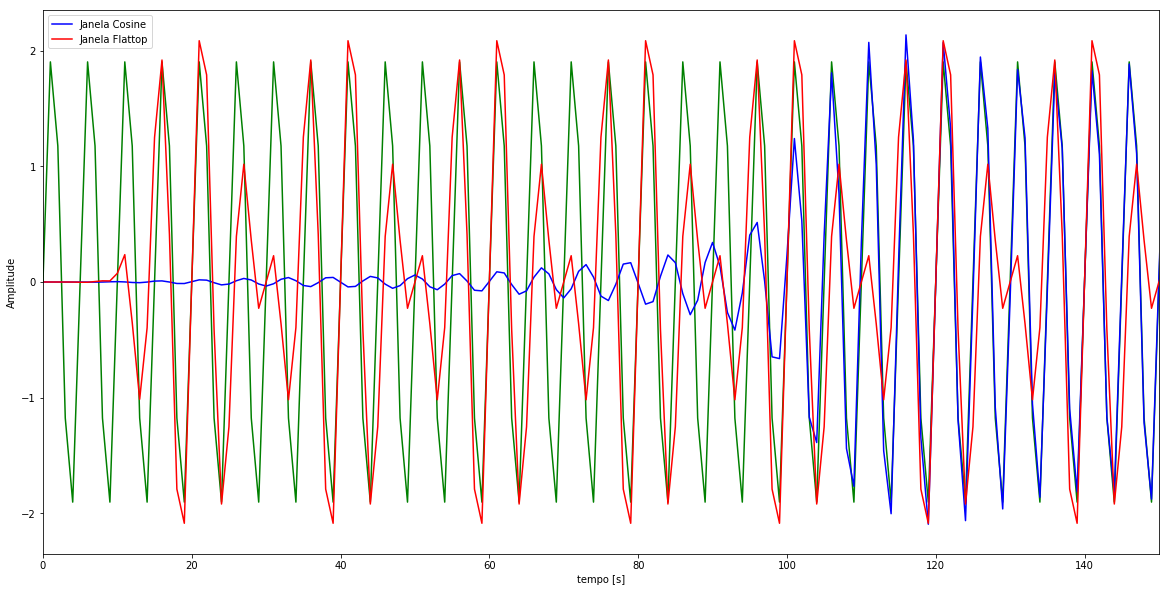

In [129]:
plt.figure(figsize=(20,10))
plt.plot((yb_ideal),'g')
plt.plot((yb1),'b',label="Janela Cosine")
plt.plot((yb2),'r',label="Janela Flattop")
plt.legend(loc='upper left')
plt.ylabel('Amplitude')
plt.xlabel('tempo [s]')
plt.xlim((0,150))
plt.show()

A janela Cosine junto com um filtro passa alta resultou em um atraso de sinal consideralvemente maior do
que a janela Flattop, sendo uma diferença de aproximadamente oitenta segundos. 

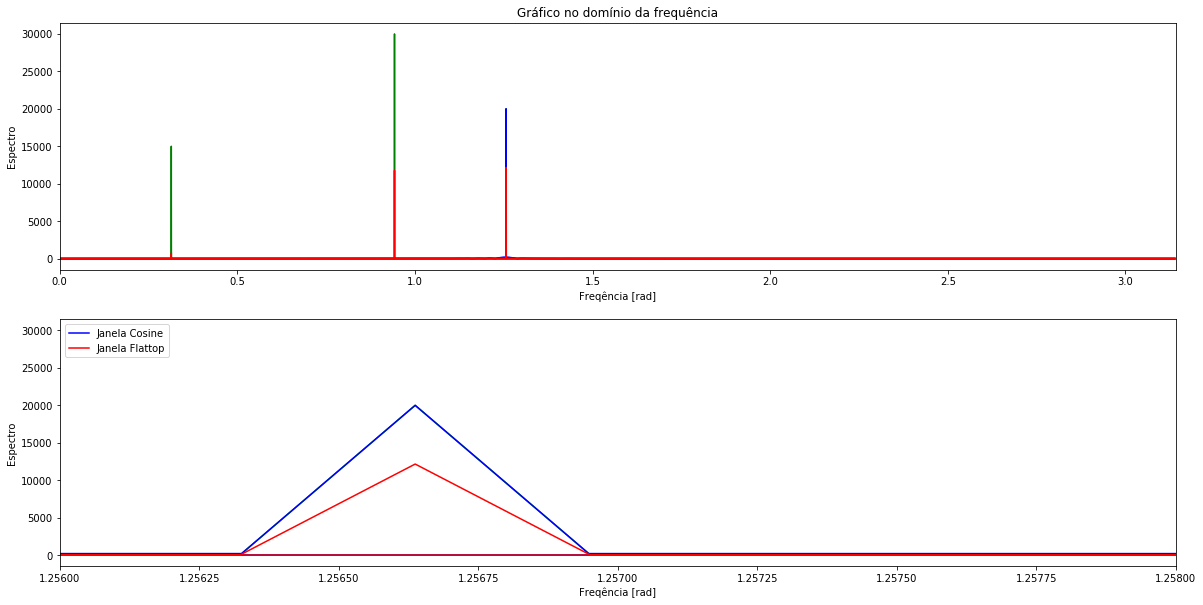

In [132]:
plt.figure(figsize=(20,10))

plt.subplot(2, 1, 1)
plt.plot(x_freq,abs(x_sp),'g')
plt.plot(yb1_freq,(abs(yb1_sp)),'b')
plt.plot(yb2_freq,(abs(yb2_sp)),'r')
plt.ylabel('Espectro')
plt.title('Gráfico no domínio da frequência')
plt.xlabel('Freqência [rad]')
plt.xlim(0,np.pi)

plt.subplot(2, 1, 2)
plt.plot(x_freq,abs(x_sp),'g') 
plt.plot(yb1_freq,(abs(yb1_sp)),'b',label="Janela Cosine") 
plt.plot(yb2_freq,(abs(yb2_sp)),'r',label="Janela Flattop")
plt.legend(loc='upper left')
plt.ylabel('Espectro')
plt.xlabel('Freqência [rad]')
plt.xlim((1.256,1.258))
plt.show()

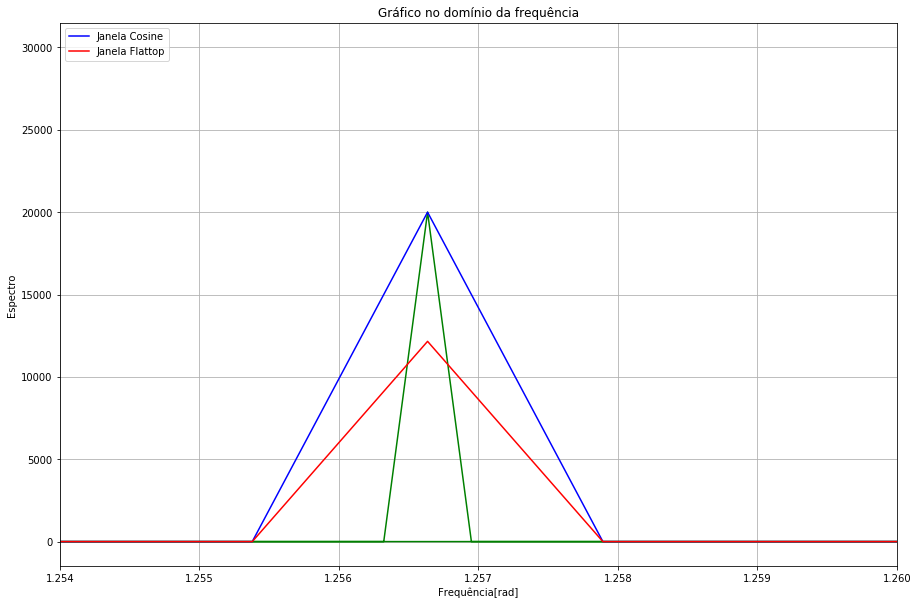

In [134]:

yb11_freq, yb11_sp = signal.freqz(yb1, worN=2500)
yb12_freq, yb12_sp = signal.freqz(yb2, worN=2500)

plt.figure(figsize=(15,10))


plt.plot(x_freq,(abs(x_sp)),'g')
plt.plot(yb11_freq ,(abs(yb11_sp)), 'b',label="Janela Cosine") 
plt.plot(yb11_freq ,(abs(yb12_sp)), 'r',label="Janela Flattop")
plt.legend(loc='upper left')
plt.xlim(1.254,1.26)
plt.ylim()
plt.ylabel('Espectro')
plt.xlabel('Frequência[rad]')
plt.title('Gráfico no domínio da frequência')
plt.grid(True)




# Filtro com função Filtfilt (Janela Cosine)

In [89]:
a = 1
b = filtro_b1 

In [90]:
yb1_1 = sp.signal.filtfilt(b,a,x) # filtro filtfilt


C:\Users\Herivelto Macedo\Anaconda3\lib\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
C:\Users\Herivelto Macedo\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\Herivelto Macedo\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will

In [91]:
yb1_sp_1 = np.fft.fft(yb1_1) 
yb1_freq_1 = np.fft.fftfreq(len(yb1_1), 1/2/np.pi) 

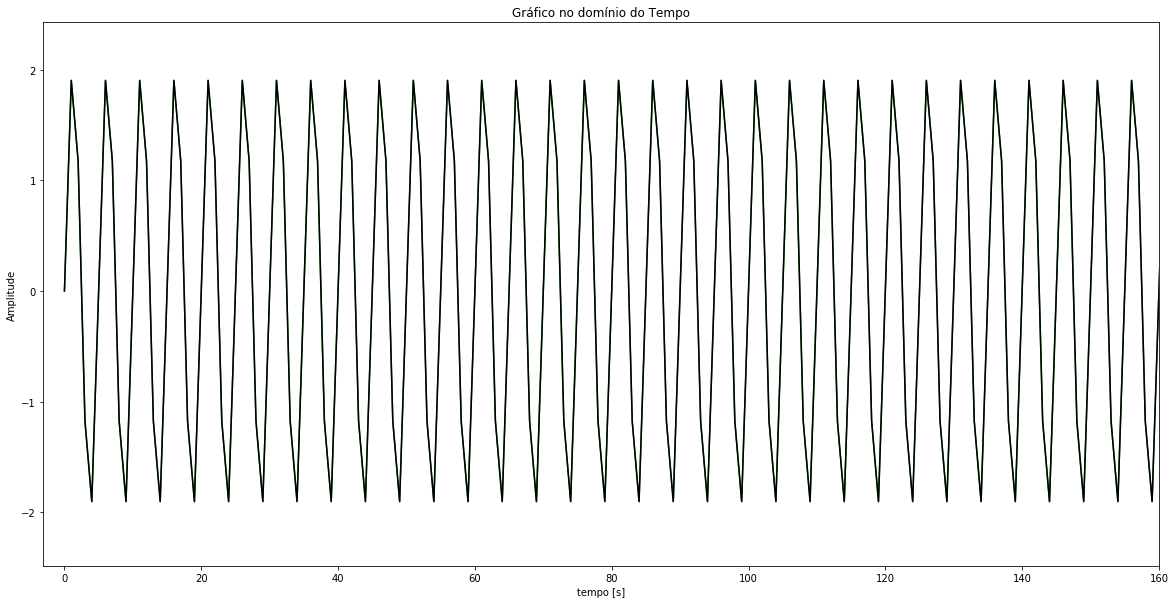

In [92]:
plt.figure(figsize=(20,10))
plt.plot((yb_ideal),'g')
plt.plot((yb1_1),'black')
plt.title('Gráfico no domínio do Tempo')
plt.ylabel('Amplitude')
plt.xlabel('tempo [s]')
plt.xlim((-np.pi,160))
plt.show()

O Filtro Filtfilt apresentou uma resposta muito satisfatório,onde foi possível notar um atraso 
quase nulo na resposta do sinal após passar pelo filtro. Contudo, a desvantagem é que a ferramenta
funciona apenas para sinais já conhecidos.

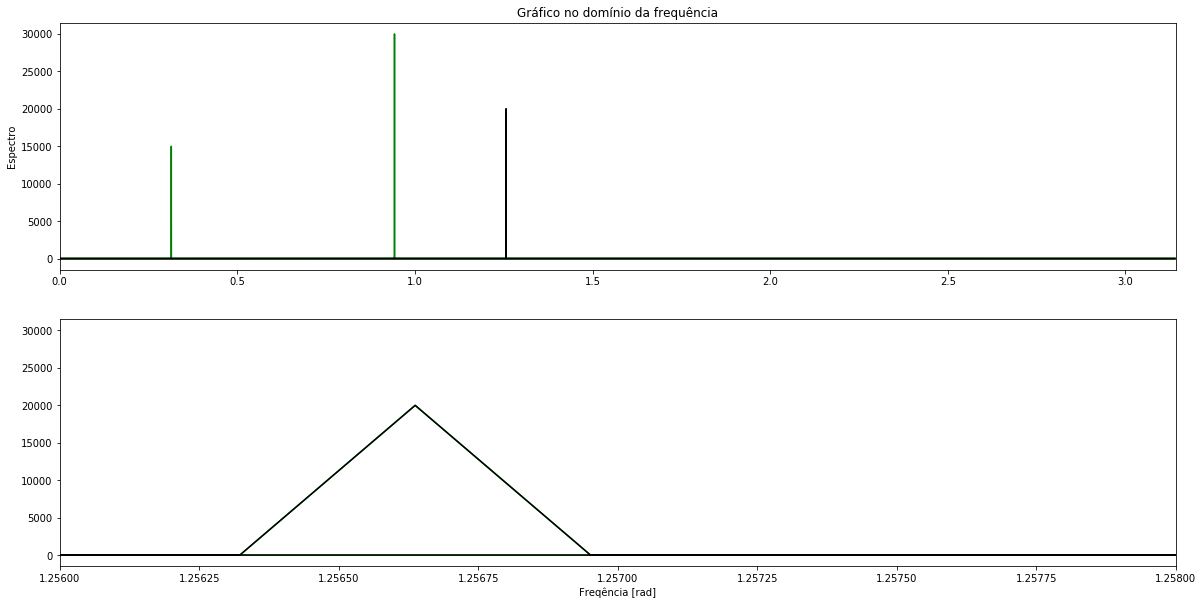

In [138]:
plt.figure(figsize =(20,10))
plt.subplot(2, 1, 1)
plt.plot(x_freq,abs(x_sp),'g')
plt.plot(yb1_freq_1,(abs(yb1_sp_1)),'black',)
plt.ylabel('Espectro')
plt.title('Gráfico no domínio da frequência')
plt.xlim(0,np.pi)


plt.subplot(2, 1, 2)
plt.plot(x_freq,abs(x_sp),'g') 
plt.plot(yb1_freq_1,(abs(yb1_sp_1)),'black') 
plt.xlabel('Freqência [rad]')
plt.xlim((1.256,1.258))
plt.show()

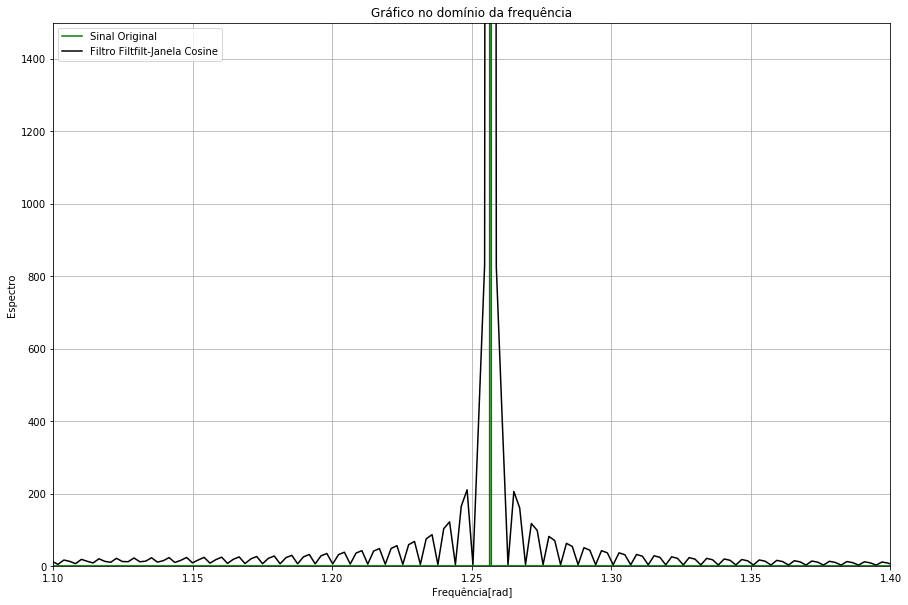

In [140]:

yb1_freq_11, yb1_sp_11 = signal.freqz(yb1_1, worN=1500)


plt.figure(figsize=(15,10))


plt.plot(x_freq,(abs(x_sp)),'g',label="Sinal Original")  
plt.plot(yb1_freq_11 ,(abs(yb1_sp_11)), 'black',label="Filtro Filtfilt-Janela Cosine") 
plt.legend(loc='upper left')
plt.xlim(1.1,1.4)
plt.ylim(0,1500)
plt.title('Gráfico no domínio da frequência')
plt.ylabel('Espectro')
plt.xlabel('Frequência[rad]')
plt.grid(True)

No domínio da frequência foi possível identificar uma atenuação quase que simetrica e uma resposta rápida.

## c) Rejeita-faixa (yc): em que a frequência correspondente à a2 seja filtrada e não apareça na saída do filtro.

## Janela nuttall

In [95]:
filtro_c1 = sp.signal.firwin(301,[2.6,3.5], width=None, window='nuttall', fs=fs)

In [96]:
yc1 = np.convolve(x,filtro_c1)

In [97]:
yc1_sp = np.fft.fft(yc1) 

In [98]:
yc1_freq = np.fft.fftfreq(len(yc1), 1/2/np.pi) 

## Janela triang

In [99]:
filtro_c2 = sp.signal.firwin(31, [2.6,3.5] ,width=None, window='triang', fs=fs)

In [100]:
yc2 = np.convolve(x,filtro_c2)

In [101]:
yc2_sp = np.fft.fft(yc2) 

In [102]:
yc2_freq = np.fft.fftfreq(len(yc2), 1/2/np.pi) 

Sinal ideal

In [103]:
yc_ideal = 1.5*np.sin(2*np.pi*a1*t) + 2*np.sin(2*np.pi*(a1+a2)*t)

#### Gráfico no domínio do *tempo*

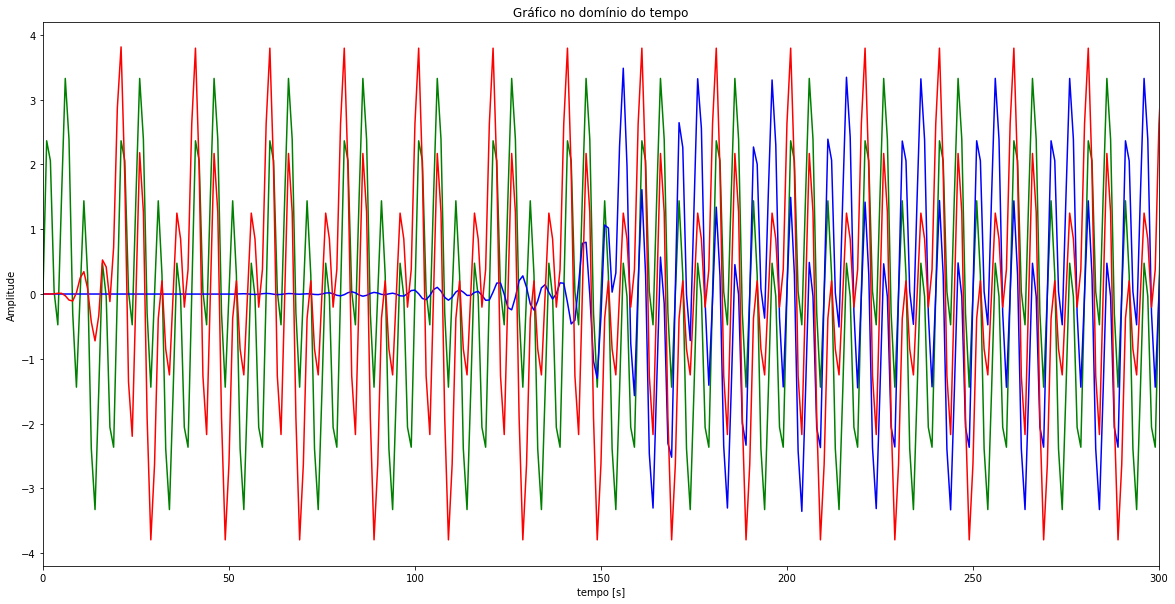

In [104]:
plt.figure(figsize=(20,10))
plt.plot((yc_ideal),'g')
plt.plot((yc1),'b')
plt.plot((yc2),'r')
plt.title('Gráfico no domínio do tempo')
plt.ylabel('Amplitude')
plt.xlabel('tempo [s]')
plt.xlim((0,300))
plt.show()

#### Gráfico no domínio da *frequência*

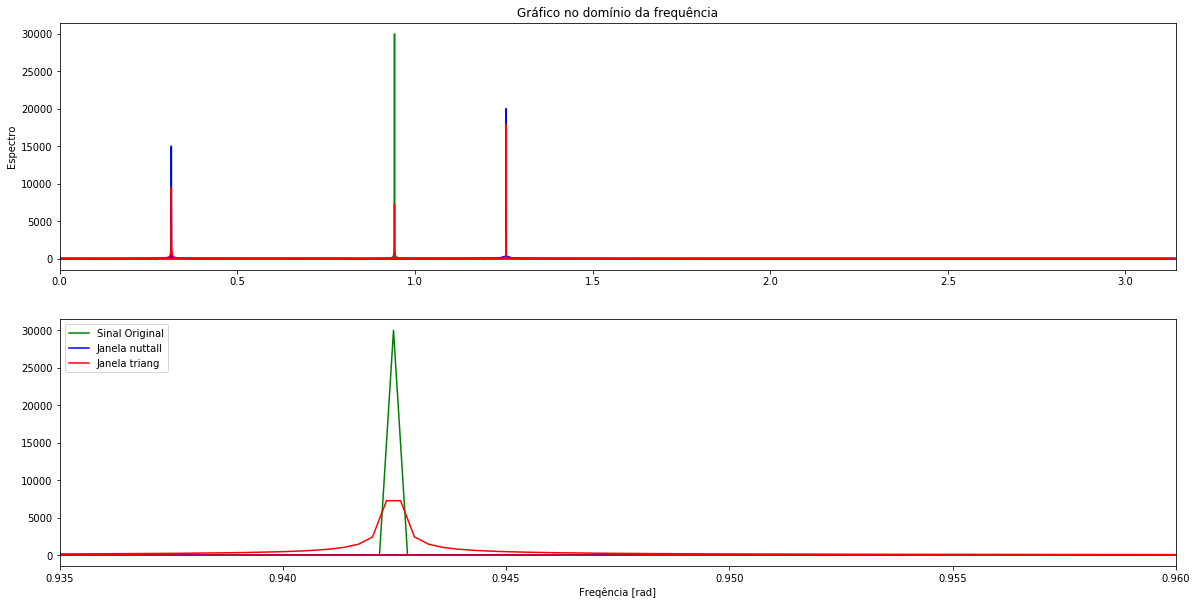

In [144]:
plt.figure(figsize=(20,10))

plt.subplot(2, 1, 1)
plt.plot(x_freq,abs(x_sp),'g')
plt.plot(yc1_freq,(abs(yc1_sp)),'b',)
plt.plot(yc2_freq,(abs(yc2_sp)),'r')
plt.ylabel('Espectro')
plt.title('Gráfico no domínio da frequência')
plt.xlim(0,np.pi)

plt.subplot(2, 1, 2)
plt.plot(x_freq,abs(x_sp),'g',label="Sinal Original") 
plt.plot(yc1_freq,(abs(yc1_sp)),'b',label="Janela nuttall") 
plt.plot(yc2_freq,(abs(yc2_sp)),'r',label="Janela triang")
plt.legend(loc='upper left')
plt.xlabel('Freqência [rad]')
plt.xlim((0.935,0.96))

plt.show()

Conclusão:
Filtrar por meio de janelamento é uma técnica muito boa pois nos permite mexer apenas nos parãmetros da própria janela,
ao invés de alterarmos o sinal original colocando polos/zeros em sua funçao.
Os tipos de janelamento variam entre si de acordo com seus parâmetros,
porém alguns tipos de janela fazem uma filtragem melhor, por exemplo a janela Kaiser,
em que se pode escolher detalhes a mais de acordo com seu projeto.Além disso, diferentes tipos de funçoes também podem melhorar o resultado da filtragem,
como a função filtfilt.

# DESAFIO DE FILTRAGEM DA VOZ DO JOÃO

 #### A voz do João está atrapalhano escutar um determinado áudio, postado na página da disciplina como “vozJoao_hallelujah.wav”. Projete um filtro FIR em que a saída apareça apenas a voz do João. Projete outro filtro FIR que apareça apenas o que não é voz do João, i.e. que apareça o trecho da música de fundo.

In [1]:
from scipy.io import wavfile

from IPython.display import Audio

#fs, data = wavfile.read('vozJoao_hallelujah.wav')

Audio(filename='C:/Users/Fernando/Desktop/Notebook/vozJoao_hallelujah.wav')


C:\Users\Herivelto Macedo\Anaconda3\lib\site-packages\scipy\io\wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


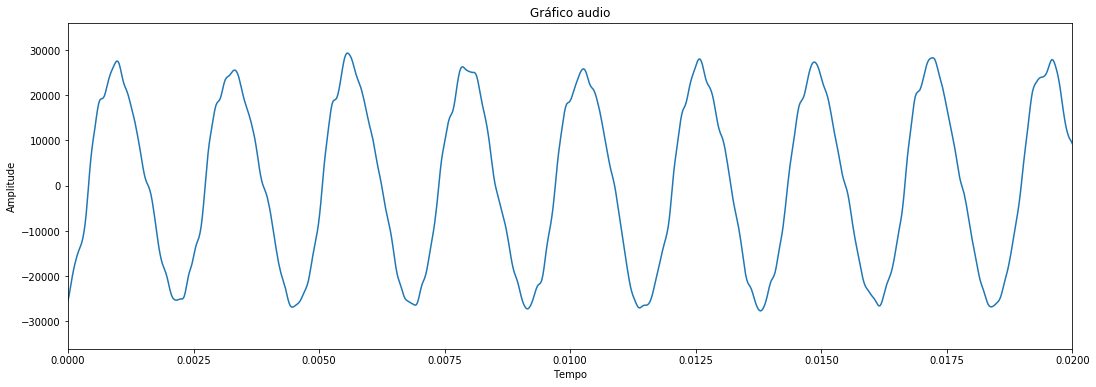

In [54]:
from scipy.io.wavfile import read

# read audio samples
input_data = read("C:/Users/Fernando/Desktop/Notebook/vozJoao_hallelujah.wav")
sample_rate = input_data[0]
audio = input_data[1]

x_axis = np.linspace(0, len(audio)/sample_rate, len(audio))

plt.figure(figsize=(18,6))
plt.plot(x_axis, audio)
plt.ylabel("Amplitude")
plt.xlabel("Tempo")

plt.title("Gráfico audio")

plt.xlim((0,0.02))

plt.show()

In [38]:
yaudio_sp = np.fft.fft(audio) 

In [39]:
yaudio_freq = np.fft.fftfreq(len(audio), 1/2/np.pi) 

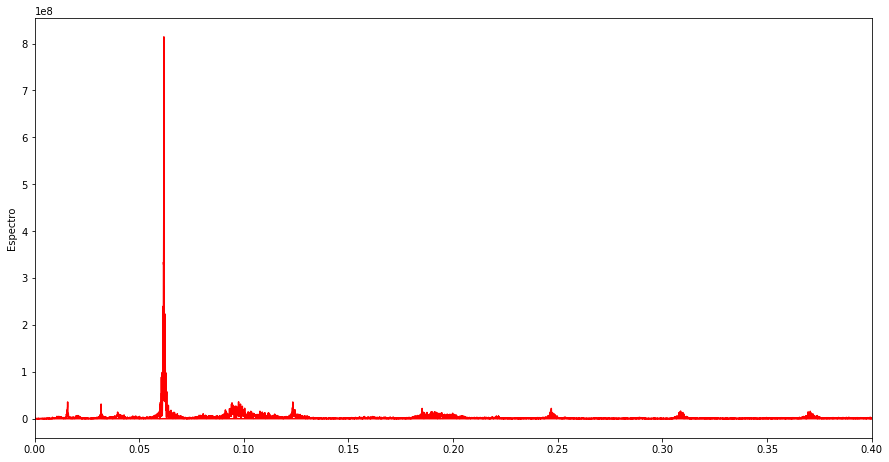

In [40]:
plt.figure(figsize=(15,17))

plt.subplot(2, 1, 1)
plt.plot(yaudio_freq,(abs(yaudio_sp)),'r')
plt.ylabel('Espectro')
plt.xlim(0,0.4)

plt.show()

Filtrando a música de fundo

In [41]:
#frequencia de amostragem = 44100

In [43]:
filtro_audio = sp.signal.firwin(1001,[300,550], width=None, window='triang', fs=sample_rate, pass_zero=0)

In [44]:
yaudio = np.convolve(audio,filtro_audio)

In [45]:
yaudio_filtrado_sp = np.fft.fft(yaudio) 

In [46]:
yaudio_filtrado_freq = np.fft.fftfreq(len(yaudio), 1/2/np.pi) 

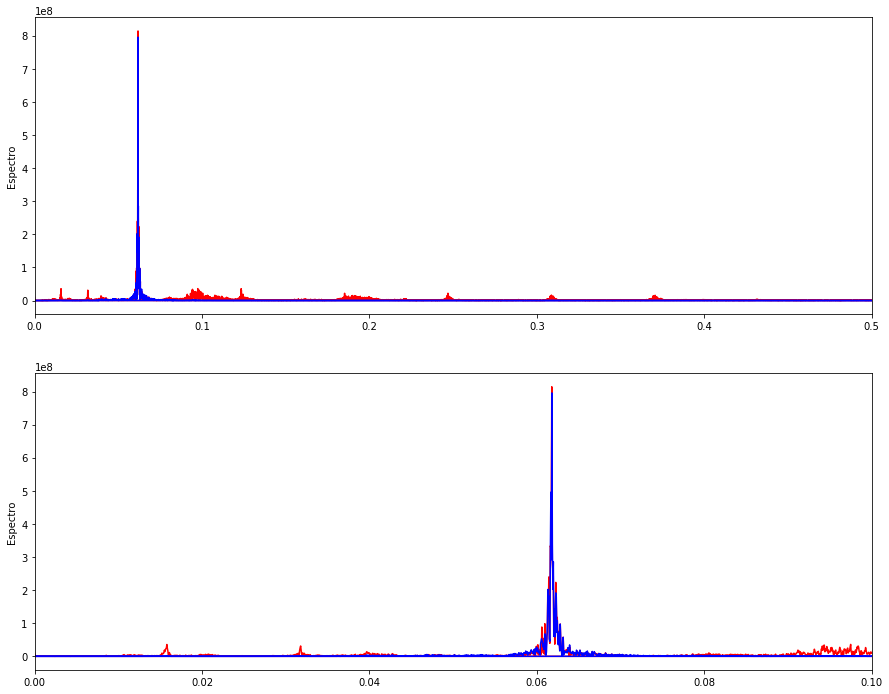

In [47]:
plt.figure(figsize=(15,12))

plt.subplot(211)
plt.plot(yaudio_freq,(abs(yaudio_sp)),'r')
plt.plot(yaudio_filtrado_freq,(abs(yaudio_filtrado_sp)),'b')
plt.ylabel('Espectro')
plt.xlim(0.0,0.5)

plt.subplot(212)
plt.plot(yaudio_freq,(abs(yaudio_sp)),'r')
plt.plot(yaudio_filtrado_freq,(abs(yaudio_filtrado_sp)),'b')
plt.ylabel('Espectro')
plt.xlim(0.0,0.1)

plt.show()

Filtrando a voz do João

In [49]:
filtro_audio2 = sp.signal.firwin(7001,[30,550], width=None, window='nuttall', fs=sample_rate)

In [50]:
yaudio2 = np.convolve(audio,filtro_audio2)

In [51]:
yaudio2_filtrado_sp = np.fft.fft(yaudio2) 

In [52]:
yaudio2_filtrado_freq = np.fft.fftfreq(len(yaudio2), 1/2/np.pi) 

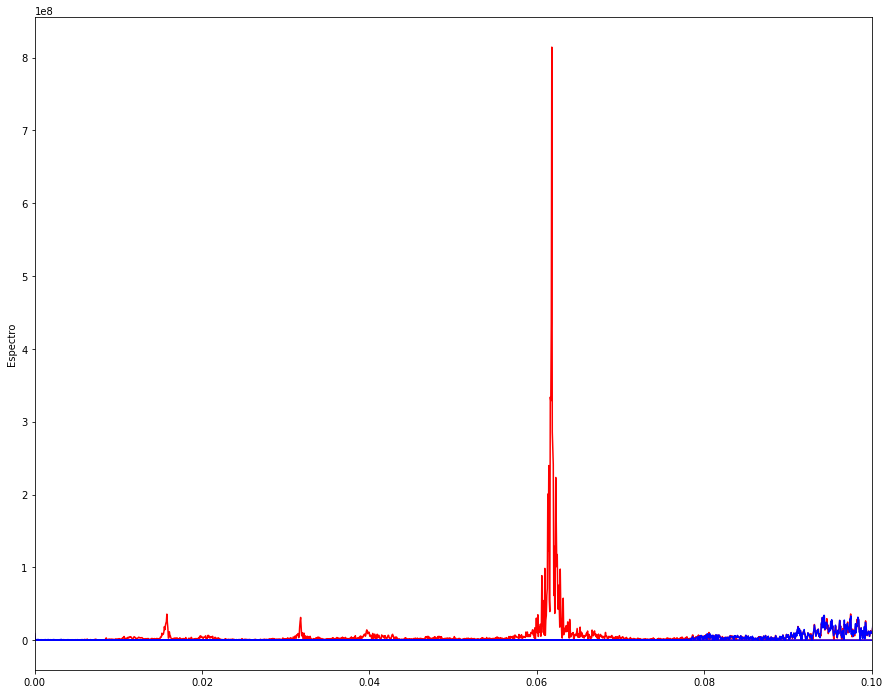

In [53]:
plt.figure(figsize=(15,12))

plt.plot(yaudio_freq,(abs(yaudio_sp)),'r')
plt.plot(yaudio2_filtrado_freq,(abs(yaudio2_filtrado_sp)),'b')
plt.ylabel('Espectro')
plt.xlim(0.0,0.1)

plt.show()